# The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is. For every in the test set, you should predict the correct label.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Structure
1. Data exploration.
2. Feature engineering.
3. Data Preprocessing for Model.
4. Basic model building.
5. Model tunning.
6. Ensamble model building.
7. Results.

In [18]:
training = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print(f"Training size {training.shape}.")
print(f"Test size {test.shape}.")

Training size (42000, 785).
Test size (28000, 784).


In [19]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [20]:
print(training.isnull().sum()) # No null values, so no need to think how to manage them. 

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

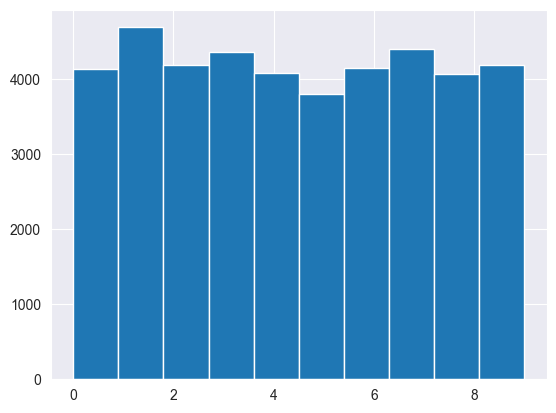

In [21]:
df_labels = training['label']
plt.hist(df_labels)

The digits we have information to predict are pretty equal in terms of quantity, except number '1'. It has more but not crazy more.

## Data Preprocessing for Model.


## Data augmentation

In [25]:
X = training.drop('label', axis=1).values
y = training['label'].values

# Reshape the data to fit the CNN input
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,        
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,                          
)

# Model building.

In [29]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    
    Conv2D(64, (5, 5), activation="relu"),
    BatchNormalization(),
    Conv2D(64, (5, 5), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer = 'adam',
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 20, 20, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 1, 1, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,426 (923.54 KB)

 Trainable params: 235,274 (919.04 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [46]:
model2 = Sequential([
    Input(shape=(28, 28, 1)),
    
    # First convolutional block
    Conv2D(64, (5, 5), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(64, (5, 5), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Second convolutional block
    Conv2D(128, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Third convolutional block
    Conv2D(256, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Fourth convolutional block
    Conv2D(512, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    
    # Fully connected layers
    Dense(1024, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    
    # Output layer
    Dense(10, activation="softmax")
])

model2.compile(
    optimizer = 'adam',
    #optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

# Print model summary to check the architecture
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,949,642 (22.70 MB)

 Trainable params: 5,942,218 (22.67 MB)

 Non-trainable params: 7,424 (29.00 KB)

In [47]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-4
)

In [48]:
batch = 64
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model2.fit(
    datagen.flow(X_train, y_train, batch_size=batch),
    epochs=30,
    validation_data=(X_val, y_val),
    #callbacks=[early_stopping]
    callbacks=[reduce_lr]
)

Epoch 1/30


/Users/geronimobasso/Desktop/extra/kaggle-competitions/titanic/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 242s 455ms/step - accuracy: 0.5588 - loss: 1.5158 - val_accuracy: 0.8124 - val_loss: 0.5134 - learning_rate: 0.0010
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 234s 446ms/step - accuracy: 0.9508 - loss: 0.1713 - val_accuracy: 0.9864 - val_loss: 0.0485 - learning_rate: 0.0010
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 243s 464ms/step - accuracy: 0.9656 - loss: 0.1184 - val_accuracy: 0.9851 - val_loss: 0.0546 - learning_rate: 0.0010
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 240s 457ms/step - accuracy: 0.9756 - loss: 0.0894 - val_accuracy: 0.9880 - val_loss: 0.0444 - learning_rate: 0.0010
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 238s 454ms/step - accuracy: 0.9795 - loss: 0.0739 - val_accuracy: 0.9855 - val_loss: 0.0499 - learning_rate: 0.0010
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 236s 449ms/step - accuracy: 0.9803 - loss: 0.0754 - val_accuracy: 0.9863 - val_loss: 0.0565 - learning_rate: 0.0010
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 230s 439ms/step - accuracy: 0.9808 

In [49]:
train_loss, train_accuracy = model2.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 0.9991


In [50]:
test_loss, test_accuracy = model2.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9961


263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step


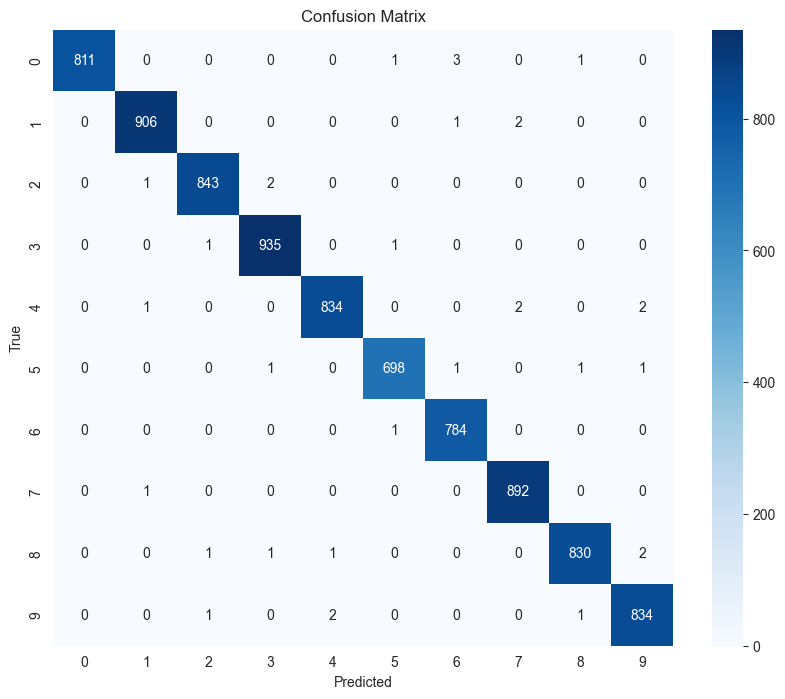

In [51]:
# Obtain predictions on the test set
predictions = model2.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

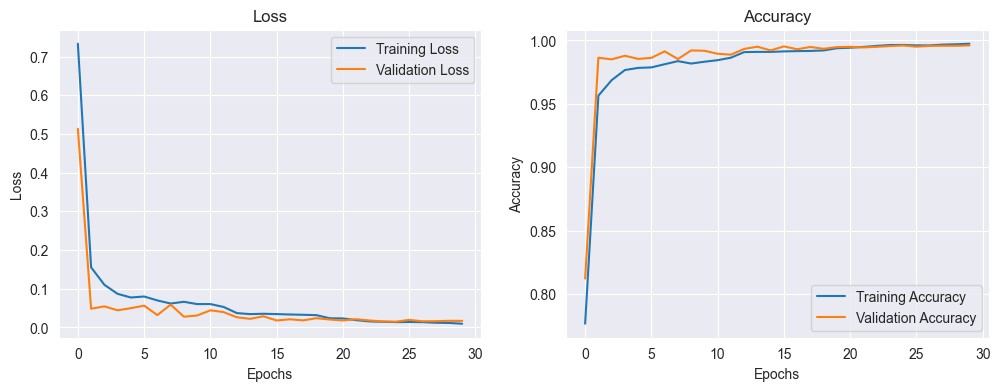

In [52]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Make upload predictions

In [53]:
X = test.values

# Reshape the data to fit the CNN input
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

predictions = model2.predict(X) # the predictions values are not final, we need to apply softmax again in order to change them to probability.

875/875 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step


In [54]:
print(predictions[0])

[2.5911612e-07 1.0759907e-07 9.9999368e-01 8.5229522e-07 6.8120862e-08
 9.4885060e-08 3.5070315e-07 3.3173508e-06 1.1784792e-06 7.7557196e-08]


In [55]:
sm_preferred = tf.nn.softmax(predictions).numpy() # Now with this the values are probabilities, we need to do a final change to get the index with the highes probability in order to get the final predictions.
print(sm_preferred[0])

[0.08533683 0.08533683 0.23196805 0.08533689 0.08533682 0.08533683
 0.08533684 0.0853371  0.08533692 0.08533682]


In [56]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[2 0 9 ... 3 9 2]


In [57]:
# Create Image ID column.
image_id = []
for x in range(1, test.shape[0] + 1):
    image_id.append(x)

In [58]:
output = pd.DataFrame({'ImageId': image_id, 'Label': predictions})

model2 = 'cnn'
now = datetime.now()
date_time_str = now.strftime("%Y%m%d_%H%M%S")

output.to_csv(f'predictions/{model2}_{date_time_str}.csv', index=False)

# Results

99.567% as the best result, final summary:

- Data augmentation make not real impact so far, at least rotating images in this dataset make no significant improvement.
- Model evaluate function for getting accuracy was pretty useful, also the confusion matriz to understand where we were doing worst. 
